# Numerical Simulation Laboratory

# Numerical exercise 9

## Algoritmo Genetico

### <font color='blue'> Città lungo una circonferenza</font>

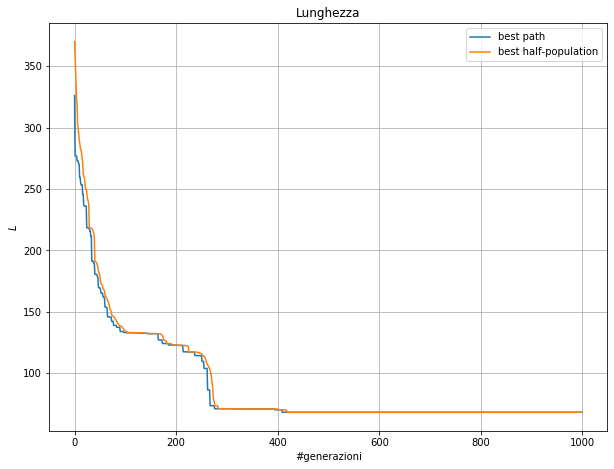

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))

x1, L1 = np.loadtxt('./Files/Circle/lenght.out', delimiter='  ', unpack=True)
avex1, aveL1 = np.loadtxt('./Files/Circle/avelenght.out', delimiter='  ', unpack=True)

plt.plot(x1, L1, label='best path')
plt.plot(avex1, aveL1, label='best half-population')
plt.title("Lunghezza")
plt.legend()
plt.xlabel('#generazioni')
plt.ylabel('$L$')
plt.grid(True)

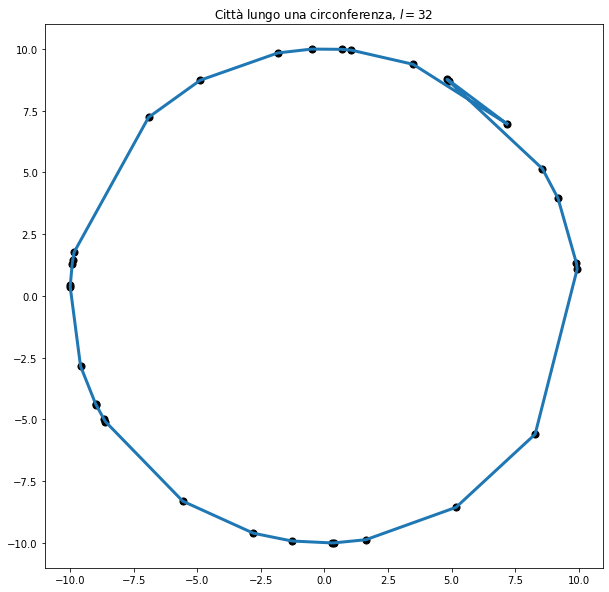

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

plt.figure(figsize=(10, 10))
ncities = 32

xc, yc = np.loadtxt('./Files/Circle/cities.out', unpack=True)
path = np.loadtxt('./Files/Circle/best_path.out', unpack=True)

xp = []
yp = []

for i in range(ncities):
    index = int(path[i])
    xp.append(xc[index])
    yp.append(yc[index])

index = int(path[0])
xp.append(xc[index])
yp.append(yc[index])

plt.scatter(xc, yc, s=50, c='black') #città
plt.plot(xp, yp,  zorder=1, lw=3) #percorso
plt.title("Città lungo una circonferenza, $l=32$")
plt.show()

### <font color='blue'> Città in un quadrato</font>

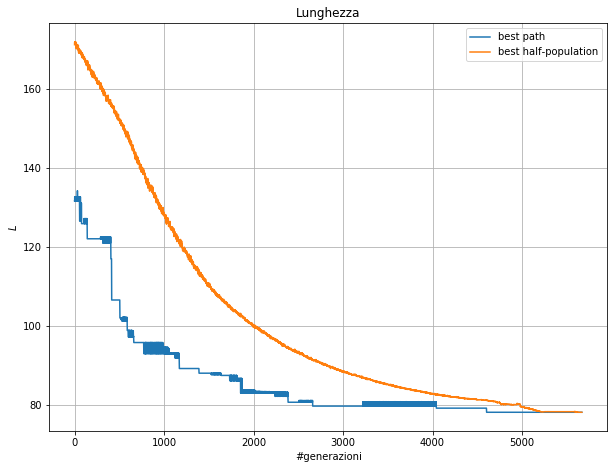

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))

x1, L1 = np.loadtxt('./Files/Square/lenght.out', delimiter='  ', unpack=True)
avex1, aveL1 = np.loadtxt('./Files/Square/avelenght.out', delimiter='  ', unpack=True)

plt.plot(x1, L1, label='best path')
plt.plot(avex1, aveL1, label='best half-population')
plt.title("Lunghezza")
plt.legend()
plt.xlabel('#generazioni')
plt.ylabel('$L$')
plt.grid(True)

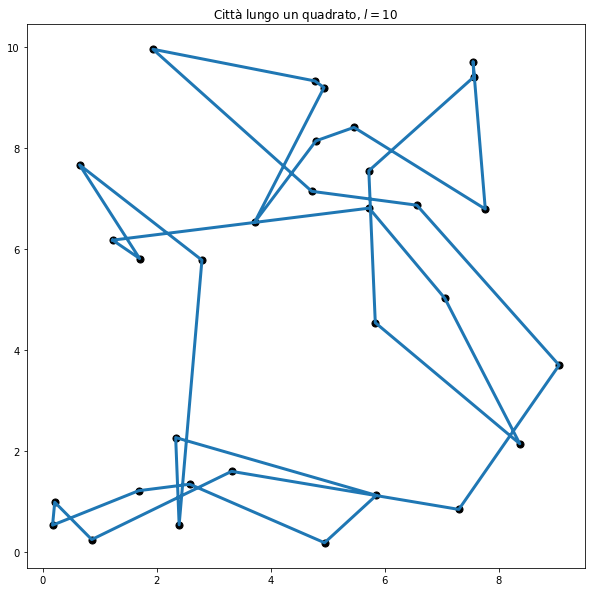

In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

plt.figure(figsize=(10, 10))

xc, yc = np.loadtxt('./Files/Square/cities.out', unpack=True)
path = np.loadtxt('./Files/Square/best_path.out', unpack=True)

xp = []
yp = []

for i in range(32):
    index = int(path[i])
    xp.append(xc[index])
    yp.append(yc[index])

index = int(path[0])
xp.append(xc[index])
yp.append(yc[index])

plt.scatter(xc, yc, s=50, c='black') #città
plt.plot(xp, yp,  zorder=1, lw=3) #percorso
plt.title("Città lungo un quadrato, $l=10$")
plt.show()